# Importação da informação

## Importar pacotes

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [378]:
import seaborn as sns

## Importar base salva

In [323]:
# Onde salvar .csv
export_path = 'export_tmdb_database'
export_image_path = 'export_image'

In [324]:
df_movies_abt = pd.read_csv(f"{export_path}\df_movies_abt.csv")
df_movies_abt.head()

,movie_id,adult,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,nmonth_release,...,genre Horror,genre Music,genre Mystery,genre Romance,genre Science Fiction,genre TV Movie,genre Thriller,genre War,genre Western,financial_success
0,1107083,0,182685,hi,0.7,2557594,150,10.0,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1107828,0,130000,mr,0.6,560000,125,10.0,1,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1108726,0,90000000,en,1.4,161600000,90,0.0,0,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1111182,0,6000000,en,0.6,66623990,120,7.0,1,8,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1008660,0,9205858,sw,0.6,500028,1,0.0,0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


## Análise Exploratória 

### Macros para análise exploratória

In [325]:
# Função para gerar bloxplot personalizado
def eda_boxplot(df, column_name, fig_size=None, export_image=False, local_save=''):

    # Check variables
    if str(type(df)) != "<class 'pandas.core.frame.DataFrame'>" \
            or str(type(column_name)) != "<class 'str'>" \
            or str(type(export_image)) != "<class 'bool'>" \
            or str(type(local_save)) != "<class 'str'>" \
            :
        print('Variables are not correct!')
        return

    # size background color
    if type(fig_size) == tuple:
        if len(list(fig_size)) != 2: fig_size = None
    else: fig_size=None

    # local_save
    if not local_save == '':
        local_save_plus = f"{local_save}\\"
    else:
        local_save_plus = ''

    # set figure
    fig, ax = plt.subplots(figsize=fig_size)
    ax.set_facecolor('#F0F0F0')
    plt.ticklabel_format(useOffset=False)

    # customize the boxplot colors
    _boxprops = dict(linestyle='-', linewidth=2, color='#465959') # Box
    _whiskerprops = dict(linestyle='-', linewidth=2, color='#465959') # Range min/max
    _flierprops = dict(marker='o', color=None, markersize=4, markerfacecolor='#6AD9D9', markeredgecolor='None') # Outliers
    _medianprops = dict(linestyle='-', linewidth=4, color='red') # Median line
    _meanprops = dict(linestyle='-', linewidth=10, color='#FF3A5C') # Mean value

    # create the boxplot with customized parameters
    #fig.text(0.80, 0.08, 'Random Numbers', backgroundcolor='#FF3A5C')
    bp = df.boxplot(column=column_name
            ,grid=False
            ,ax=ax
            ,vert=True
            ,showfliers=True
            ,meanline=True
            ,boxprops=_boxprops
            ,whiskerprops=_whiskerprops
            ,flierprops=_flierprops
            ,medianprops=_medianprops
            ,meanprops=_meanprops
            ,widths=0.5
            )

    # set the y-axis formatter to ScalarFormatter and  remove the exponential scale from the y-axis legend
    #plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
    #plt.gca().ticklabel_format(style='plain', axis='y')

    # Create a custom scaller for boxplot graphs
    def format_y_axis(y, pos=None):
        if y >= 1000000000:
            return '{:.1f} B'.format(y/1000000000)
        elif y >= 1000000:
            return '{:.1f} M'.format(y/1000000)
        elif y >= 1000:
            return '{:.1f} K'.format(y/1000)
        else:
            return '{:.1f}'.format(y)

    # Standard scale format on y axis
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

    # Apply q1, median and q3 labels
    _min, q1, median, q3, _max = np.percentile(df[column_name], [0, 25, 50, 75, 100])
    ax.text(1.275, median, f'{format_y_axis(median)}')
    if ((_max - _min) * 0.1 <= (q3 - q1)):
        if (round(median * 0.9) > round(q1)):
            ax.text(1.2755, q1, f'{format_y_axis(q1)}', va='center')
        if (round(median * 1.1) < round(q3)):
            ax.text(1.275, q3, f'{format_y_axis(q3)}', va='center')

    ax.set_xlabel('')
    
    if export_image: plt.savefig(f'{local_save_plus}{column_name}.jpg', bbox_inches='tight')
    plt.show()


In [326]:
def eda(df, max_category_rows = None, func_float_format = None):

    ########################################################################
    # GENERAL CONFIGS - BEGINNING

    # Max Rows in Category Columns - Beginning
    max_rows = pd.get_option('display.max_rows')
    if max_category_rows == None:
        max_category_rows = pd.get_option('display.max_rows')
    else:
        pd.set_option('display.max_rows',max_category_rows)

    
    # Change the float format
    current_float_format = pd.options.display.float_format
    if func_float_format != None:
        pd.options.display.float_format = func_float_format

    ########################################################################
    # GRAPHS CONFIGS
    # Boxplot

    ########################################################################
    # SHOWING INFOS

    #-----------------------------------------------------------------------
    # Print the shape of DataFrame
    print("\nDataFrame's Shape (rows, columns):")
    print(df.shape)


    #-----------------------------------------------------------------------
    # Change the float format
    print("\nThe first and the last 5 rows of the dataframe:")
    pd.set_option('display.max_columns',None)
    df_first_last_obs = pd.concat([df.head(5),df.tail(5)])
    display(df_first_last_obs)
    pd.set_option('display.max_columns',20)


    #-----------------------------------------------------------------------
    # Types of columns

    numeric_cols = pd.DataFrame(df.head(1)._get_numeric_data().columns, columns=['columns'])

    bool_cat_cols = []
    for col in list(numeric_cols['columns'].values):
        if (list(df[col].sort_values().unique()) == [0,1]) | (list(df[col].sort_values().unique()) == [0]) | (list(df[col].sort_values().unique()) == [1]):
            bool_cat_cols.append(col)

    df_dtypes = (
        pd.DataFrame(df.dtypes, columns=['data_type']).reset_index().rename({'index':'columns'}, axis='columns')

        # Get generic_data_type
        .merge(numeric_cols, on='columns', how='left', indicator=True)
        .assign(generic_data_type = lambda df : df['_merge'].apply(lambda y : 'numeric' if y == 'both' else 'categoric'))
        .drop(['_merge'], axis=1)

        # Update generic_data_type with boolean [0,1]
        .merge(pd.DataFrame(bool_cat_cols, columns=['columns']), on='columns', how='left', indicator=True)
        .assign(generic_data_type = lambda df : np.where(df['_merge'] == 'both', 'categoric', df['generic_data_type']))
        .drop(['_merge'], axis=1)

        # Update index
        .set_index(['columns'])
    )

    del numeric_cols
    del bool_cat_cols

    df_col_types_T = df_dtypes.T


    #-----------------------------------------------------------------------
    # List of numeric (non categorical) and categoric fields
    list_non_cat = list(df_dtypes[df_dtypes['generic_data_type'] == 'numeric'].index)
    list_cat = list(df_dtypes[df_dtypes['generic_data_type'] == 'categoric'].index)


    #-----------------------------------------------------------------------
    # Print summary table - non categorical fields
    print("\nSummary Table - non categorical fields:")
    df_describe_non_cat = pd.DataFrame(df[list_non_cat].describe(include='all'))
    df_describe_non_cat_cv = pd.DataFrame(df_describe_non_cat.loc['mean']/df_describe_non_cat.loc['std'], columns=['cv']).T
    df_describe_non_cat = pd.concat([df_col_types_T.loc[:, list_non_cat], df_describe_non_cat, df_describe_non_cat_cv])
    del df_describe_non_cat_cv
    
    pd.set_option('display.max_columns',None)
    display(df_describe_non_cat)
    pd.set_option('display.max_columns',20)


    #-----------------------------------------------------------------------
    # Print summary table - categorical fields
    print("\nSummary Table - categorical fields:")

    df_describe_cat = pd.DataFrame()
    for col in list_cat:
        df_tmp = pd.DataFrame(
            [[
                df[col].count()
                , df[col].value_counts().count()
                , df[col].value_counts().idxmax()
                , df[col].value_counts().max()
            ]]
            ,columns=['count', 'unique', 'top', 'freq']
            ,index=[col]
        )
        df_describe_cat = pd.concat([df_describe_cat,df_tmp])
        del df_tmp

    df_describe_cat = pd.concat([df_col_types_T.loc[:, list_cat], df_describe_cat.T])

    pd.set_option('display.max_columns',None)
    display(df_describe_cat)
    pd.set_option('display.max_columns',20)


    #-----------------------------------------------------------------------
    # Print frequency table for categorical variables
    for col in list_cat:
        if df[col].nunique() > max_category_rows:
            print(f"\nToo many unique values for column '{col}'")
        else:
            print(f"\nFrequency Table for '{col}':")
            freq_tmp = df[col].value_counts()
            freq_perc_tmp = round((freq_tmp / len(df)) * 100, 2)

            # Criando a tabela de frequência com quantidade e porcentagem
            freq_table = pd.concat([freq_tmp, freq_perc_tmp], axis=1)
            freq_table.columns = ['Quantity', 'Percentage (%)']
            display(freq_table)
    

    #-----------------------------------------------------------------------
    # Create boxplot for numerical variables
    print("\nBoxplot for Numerical Variables:")
    for col in list_non_cat:
        eda_boxplot(df,col,(3,6),True,export_image_path)
        #df[col].plot(kind='box', vert=True)
        #plt.show()


    #-----------------------------------------------------------------------
    # Create scatterplot for two numerical variables
    # print("\nScatterplot for Two Numerical Variables:")
    # num_cols = df.select_dtypes(include=[np.number]).columns
    # if len(num_cols) >= 2:
    #     x_col = num_cols[0]
    #     y_col = num_cols[1]
    #     df.plot.scatter(x=x_col, y=y_col)
    #     plt.show()
    

    # #-----------------------------------------------------------------------
    # # Print table of correlation between two variables
    # print("\nTable of Correlation Between Two Variables:")
    # num_cols = df.select_dtypes(include=[np.number]).columns
    # if len(num_cols) >= 2:
    #     x_col = num_cols[0]
    #     y_col = num_cols[1]
    #     corr = df[x_col].corr(df[y_col])
    #     print(f"{x_col} and {y_col} have a correlation of {corr}")


    ########################################################################
    # RESET CONFIGS
    pd.set_option('display.max_rows',max_rows)
    pd.options.display.float_format = current_float_format

### Executar análise exploratória (unidimensional)


DataFrame's Shape (rows, columns):
(6595, 33)

The first and the last 5 rows of the dataframe:


,movie_id,adult,budget,original_language,popularity,revenue,runtime,vote_average,vote_count,nmonth_release,nquarter_release,has_collection,spoken_languages,genre Action,genre Adventure,genre Animation,genre Comedy,genre Crime,genre Documentary,genre Drama,genre Family,genre Fantasy,genre History,genre Horror,genre Music,genre Mystery,genre Romance,genre Science Fiction,genre TV Movie,genre Thriller,genre War,genre Western,financial_success
0,1107083,0,182685,hi,0.7,2557594,150,10.0,1,3,1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1107828,0,130000,mr,0.6,560000,125,10.0,1,11,4,0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1108726,0,90000000,en,1.4,161600000,90,0.0,0,4,2,0,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1111182,0,6000000,en,0.6,66623990,120,7.0,1,8,3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1008660,0,9205858,sw,0.6,500028,1,0.0,0,6,2,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6590,199373,0,27220000,en,14.1,5496951,105,6.3,1294,7,3,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6591,199534,0,8000000,en,19.2,9630444,106,6.4,519,8,3,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
6592,199547,0,610000,te,0.7,1800000,126,6.5,3,3,1,0,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
6593,199800,0,4200000,te,2.7,2600000,163,3.7,3,9,3,0,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6594,199933,0,5000000,en,4.4,846704,99,4.3,61,9,3,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0



Summary Table - non categorical fields:


,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count,nmonth_release,nquarter_release,spoken_languages
data_type,int64,int64,float64,int64,int64,float64,int64,int64,int64,int64
generic_data_type,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric,numeric
count,6595.0,6595.0,6595.0,6595.0,6595.0,6595.0,6595.0,6595.0,6595.0,6595.0
mean,36117.2,26064225.4,21.8,72372165.3,109.4,6.4,1603.2,7.0,2.6,1.5
std,74374.1,39265014.3,118.9,150872255.3,22.8,1.0,2968.3,3.4,1.1,0.9
min,5.0,103000.0,0.6,1596.0,0.0,0.0,0.0,1.0,1.0,1.0
25%,9034.5,3800000.0,8.2,4350387.0,95.0,5.8,128.0,4.0,2.0,1.0
50%,14120.0,13000000.0,13.2,19504039.0,105.0,6.4,512.0,7.0,3.0,1.0
75%,42619.5,30625000.0,22.6,71423911.5,120.0,7.0,1637.5,10.0,4.0,2.0
max,1111182.0,999999999.0,9366.8,2920357254.0,339.0,10.0,33473.0,12.0,4.0,11.0



Summary Table - categorical fields:


,adult,original_language,has_collection,genre Action,genre Adventure,genre Animation,genre Comedy,genre Crime,genre Documentary,genre Drama,genre Family,genre Fantasy,genre History,genre Horror,genre Music,genre Mystery,genre Romance,genre Science Fiction,genre TV Movie,genre Thriller,genre War,genre Western,financial_success
data_type,int64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
generic_data_type,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric,categoric
count,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595,6595
unique,2,47,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,0,en,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
freq,6591,5542,5065,4986,5488,6271,4155,5526,6518,3475,5930,5979,6292,5884,6356,6035,5187,5894,6589,4953,6350,6473,3388



Frequency Table for 'adult':


,Quantity,Percentage (%)
0,6591,99.9
1,4,0.1



Frequency Table for 'original_language':


,Quantity,Percentage (%)
en,5542,84.0
hi,184,2.8
fr,155,2.4
ru,101,1.5
ja,83,1.3
ta,74,1.1
es,68,1.0
it,48,0.7
de,40,0.6
zh,38,0.6



Frequency Table for 'has_collection':


,Quantity,Percentage (%)
0,5065,76.8
1,1530,23.2



Frequency Table for 'genre Action':


,Quantity,Percentage (%)
0.0,4986,75.6
1.0,1609,24.4



Frequency Table for 'genre Adventure':


,Quantity,Percentage (%)
0.0,5488,83.2
1.0,1107,16.8



Frequency Table for 'genre Animation':


,Quantity,Percentage (%)
0.0,6271,95.1
1.0,324,4.9



Frequency Table for 'genre Comedy':


,Quantity,Percentage (%)
0.0,4155,63.0
1.0,2440,37.0



Frequency Table for 'genre Crime':


,Quantity,Percentage (%)
0.0,5526,83.8
1.0,1069,16.2



Frequency Table for 'genre Documentary':


,Quantity,Percentage (%)
0.0,6518,98.8
1.0,77,1.2



Frequency Table for 'genre Drama':


,Quantity,Percentage (%)
0.0,3475,52.7
1.0,3120,47.3



Frequency Table for 'genre Family':


,Quantity,Percentage (%)
0.0,5930,89.9
1.0,665,10.1



Frequency Table for 'genre Fantasy':


,Quantity,Percentage (%)
0.0,5979,90.7
1.0,616,9.3



Frequency Table for 'genre History':


,Quantity,Percentage (%)
0.0,6292,95.4
1.0,303,4.6



Frequency Table for 'genre Horror':


,Quantity,Percentage (%)
0.0,5884,89.2
1.0,711,10.8



Frequency Table for 'genre Music':


,Quantity,Percentage (%)
0.0,6356,96.4
1.0,239,3.6



Frequency Table for 'genre Mystery':


,Quantity,Percentage (%)
0.0,6035,91.5
1.0,560,8.5



Frequency Table for 'genre Romance':


,Quantity,Percentage (%)
0.0,5187,78.7
1.0,1408,21.4



Frequency Table for 'genre Science Fiction':


,Quantity,Percentage (%)
0.0,5894,89.4
1.0,701,10.6



Frequency Table for 'genre TV Movie':


,Quantity,Percentage (%)
0.0,6589,99.9
1.0,6,0.1



Frequency Table for 'genre Thriller':


,Quantity,Percentage (%)
0.0,4953,75.1
1.0,1642,24.9



Frequency Table for 'genre War':


,Quantity,Percentage (%)
0.0,6350,96.3
1.0,245,3.7



Frequency Table for 'genre Western':


,Quantity,Percentage (%)
0.0,6473,98.2
1.0,122,1.9



Frequency Table for 'financial_success':


,Quantity,Percentage (%)
0,3388,51.4
1,3207,48.6



Boxplot for Numerical Variables:


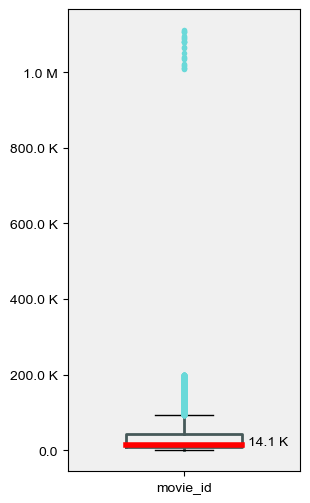

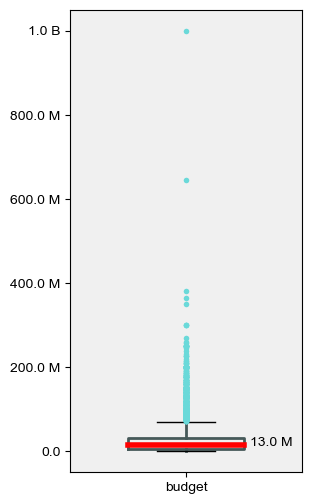

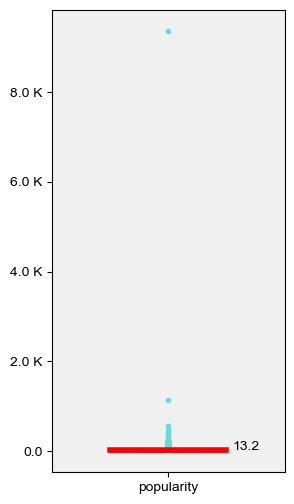

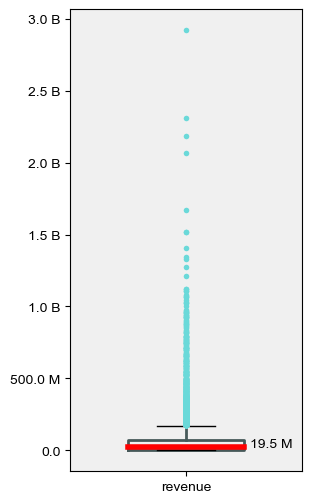

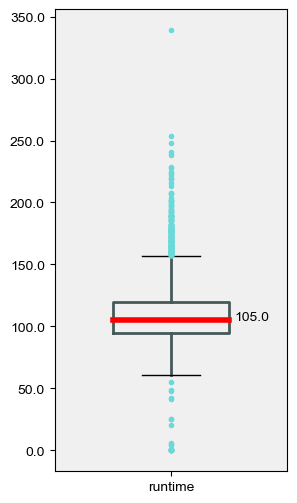

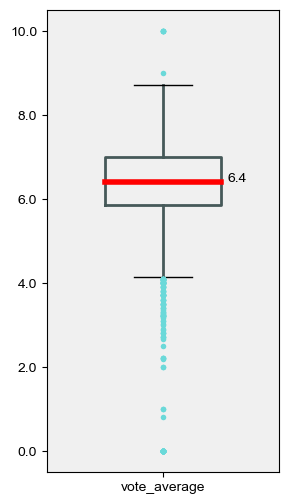

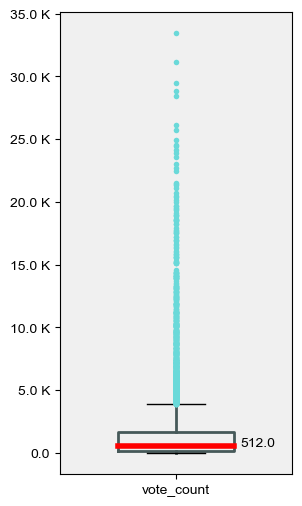

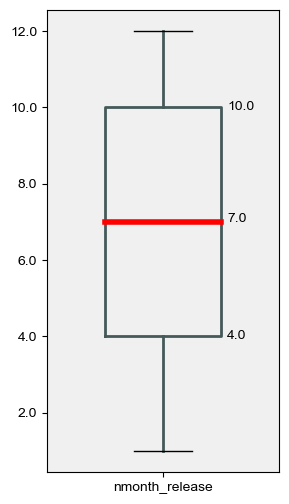

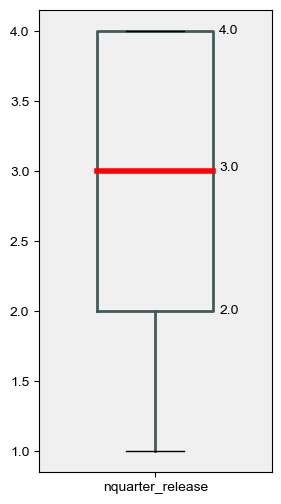

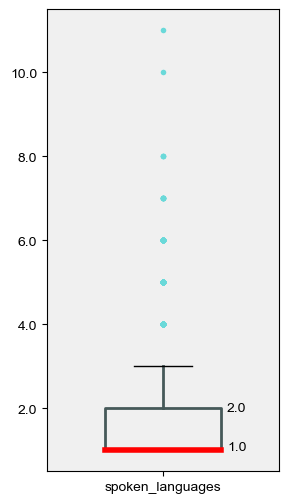

In [327]:
eda(df_movies_abt,func_float_format = '{:.1f}'.format)

In [328]:
# def eda_table_standard(df):

#     # Create standard table
#     fig, ax = plt.subplots()
#     fig.patch.set_visible(False)
#     ax.axis('off')
#     #ax.axis('tight')

#     def format_float(x):
#         return round(x,1)

#     df = df.reset_index(drop=False).rename({'index':''}, axis=1)
#     float_cols = df.select_dtypes(include=[float])
#     float_cols = float_cols.apply(format_float)
#     df[float_cols.columns] = float_cols


#     table = ax.table(
#         cellText=df.values
#         ,colLabels=df.columns
#         ,loc='center'
#         ,colColours=['#2C5955' for x in range(len(df.columns))])

#     table.auto_set_font_size(True) # desactivate auto font size
#     #table.set_fontsize(12) # define font size
   

#     #table[(1, 0)].set_facecolor("#56b5fd")


#     # mudar o tipo de fonte para calibri
#     for row in range(len(df)+1):
#         for col in range(len(df.columns)):
#             cell_text = table.get_celld()[(row, col)].get_text()
#             cell_text.set_family('opensans')
#             if row == 0:
#                 cell_text.set_weight('bold') # bold in header
#                 cell_text.set_color('white')

#             if col == 0: table[(row, col)].set_facecolor("#A9D9D9") # different color in first column

#     table.auto_set_column_width(col=list(range(len(df.columns))))
#     #table.auto_set_row_width(True)

#     # mostrar a tabela
#     plt.show()

#eda_table_standard(df_movies_abt[['movie_id', 'adult', 'budget', 'original_language', 'popularity','revenue', 'runtime', 'vote_average', 'vote_count', 'nmonth_release', 'nquarter_release', 'has_collection', 'spoken_languages']].describe())

### Executar análise exploratória (bidimensional)

In [376]:
# Função para gerar bloxplot personalizado - variável vs 'financial_success'
def eda_boxplot_financial_success(df, column_value, fig_size=None, export_image=False, local_save=''):

    # Check variables
    if str(type(df)) != "<class 'pandas.core.frame.DataFrame'>" \
            or str(type(column_value)) != "<class 'str'>" \
            or str(type(export_image)) != "<class 'bool'>" \
            or str(type(local_save)) != "<class 'str'>" \
            :
        print('Variables are not correct!')
        return

    # size background color
    if type(fig_size) == tuple:
        if len(list(fig_size)) != 2: fig_size = None
    else: fig_size=None

    # local_save
    if not local_save == '':
        local_save_plus = f"{local_save}\\"
    else:
        local_save_plus = ''

    # set figure
    fig, ax = plt.subplots(figsize=fig_size)
    ax.set_facecolor('#F0F0F0')
    plt.ticklabel_format(useOffset=False)

    # customize the boxplot colors
    _boxprops = dict(linestyle='-', linewidth=2, color='#465959') # Box
    _whiskerprops = dict(linestyle='-', linewidth=2, color='#465959') # Range min/max
    _flierprops = dict(marker='o', color=None, markersize=4, markerfacecolor='#6AD9D9', markeredgecolor='None') # Outliers
    _medianprops = dict(linestyle='-', linewidth=4, color='red') # Median line
    _meanprops = dict(linestyle='-', linewidth=10, color='#FF3A5C') # Mean value

    # create the boxplot with customized parameters
    #fig.text(0.80, 0.08, 'Random Numbers', backgroundcolor='#FF3A5C')
    bp = ax.boxplot([df[df['financial_success'] == 0][column_value],
                    df[df['financial_success'] == 1][column_value],
                    df[column_value]]
            ,labels=['0','1','Total']
            # ,grid=False
            # ,vert=True
            # ,showfliers=True
            # ,meanline=True
            ,boxprops=_boxprops
            ,whiskerprops=_whiskerprops
            ,flierprops=_flierprops
            ,medianprops=_medianprops
            ,meanprops=_meanprops
            ,widths=0.5
            )

    # set the y-axis formatter to ScalarFormatter and  remove the exponential scale from the y-axis legend
    #plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter())
    #plt.gca().ticklabel_format(style='plain', axis='y')

    # Create a custom scaller for boxplot graphs
    def format_y_axis(y, pos=None):
        if y >= 1000000000:
            return '{:.1f} B'.format(y/1000000000)
        elif y >= 1000000:
            return '{:.1f} M'.format(y/1000000)
        elif y >= 1000:
            return '{:.1f} K'.format(y/1000)
        else:
            return '{:.1f}'.format(y)

    # # Standard scale format on y axis
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(format_y_axis))

    # # Apply q1, median and q3 labels
    def apply_labels_values(series, dist):
        _min, q1, median, q3, _max = np.percentile(series, [0, 25, 50, 75, 100])
        ax.text(dist, median, f'{format_y_axis(median)}')
        if ((_max - _min) * 0.1 <= (q3 - q1)):
            if (round(median * 0.9) > round(q1)):
                ax.text(dist, q1, f'{format_y_axis(q1)}', va='center')
            if (round(median * 1.1) < round(q3)):
                ax.text(dist, q3, f'{format_y_axis(q3)}', va='center')

    apply_labels_values(df[df['financial_success'] == 0][column_value],1.3)
    apply_labels_values(df[df['financial_success'] == 1][column_value],2.3)
    apply_labels_values(df[column_value],3.3)

    #ax.set_title(f'{column_value}')
    ax.set_xlabel('financial_success')
    ax.set_ylabel(f'{column_value}')
    
    if export_image: plt.savefig(f'{local_save_plus}boxplot_{column_value}_financial_success.jpg', bbox_inches='tight')
    plt.show()


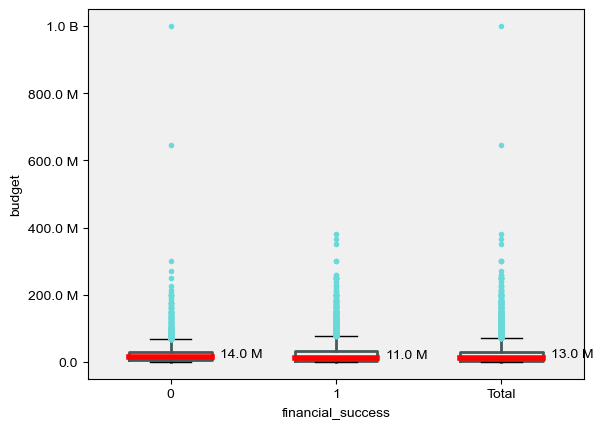

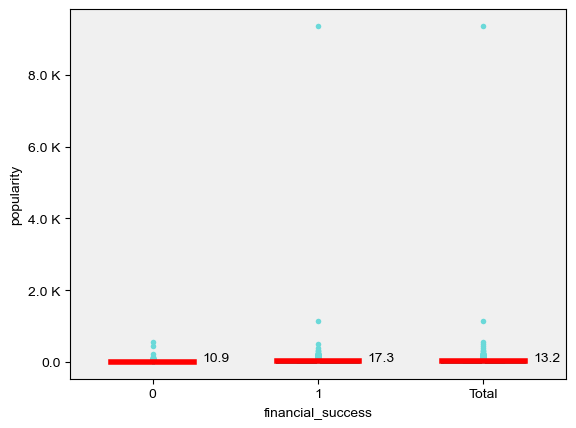

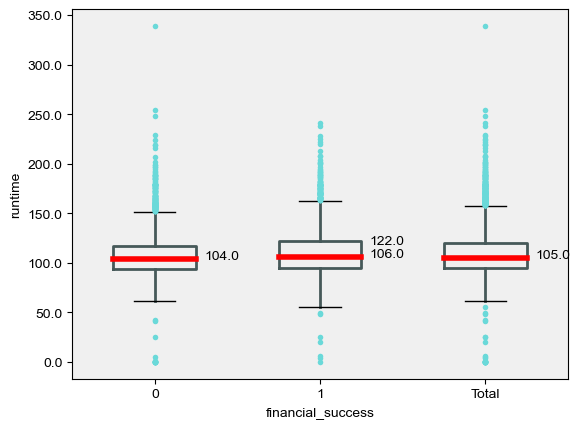

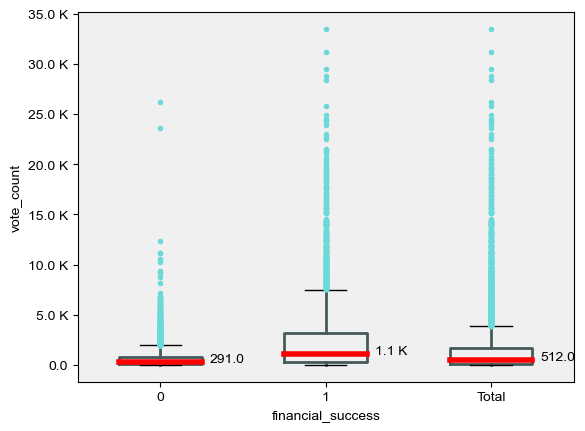

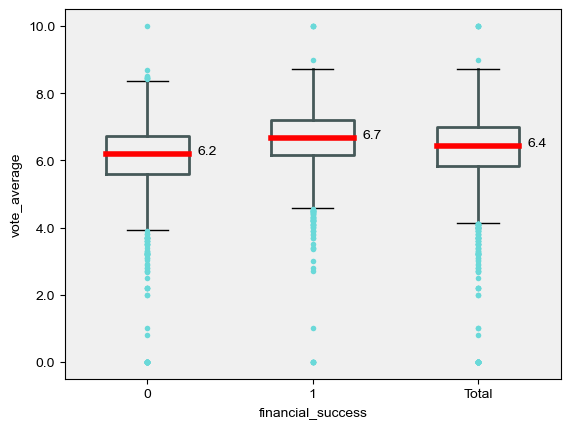

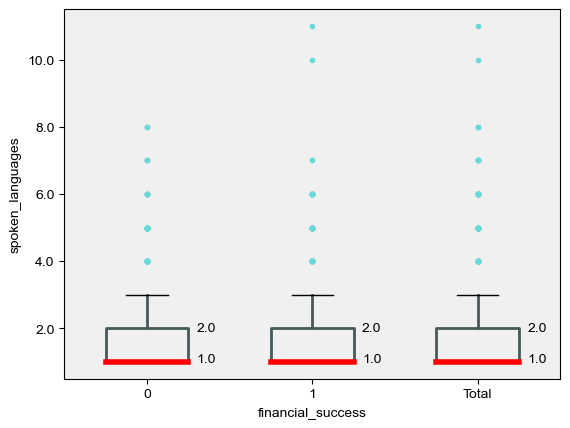

In [377]:
eda_boxplot_financial_success(df_movies_abt, 'budget', fig_size=None, export_image=True, local_save=export_image_path)
eda_boxplot_financial_success(df_movies_abt, 'popularity', fig_size=None, export_image=True, local_save=export_image_path)
eda_boxplot_financial_success(df_movies_abt, 'runtime', fig_size=None, export_image=True, local_save=export_image_path)
eda_boxplot_financial_success(df_movies_abt, 'vote_count', fig_size=None, export_image=True, local_save=export_image_path)
eda_boxplot_financial_success(df_movies_abt, 'vote_average', fig_size=None, export_image=True, local_save=export_image_path)
eda_boxplot_financial_success(df_movies_abt, 'spoken_languages', fig_size=None, export_image=True, local_save=export_image_path)

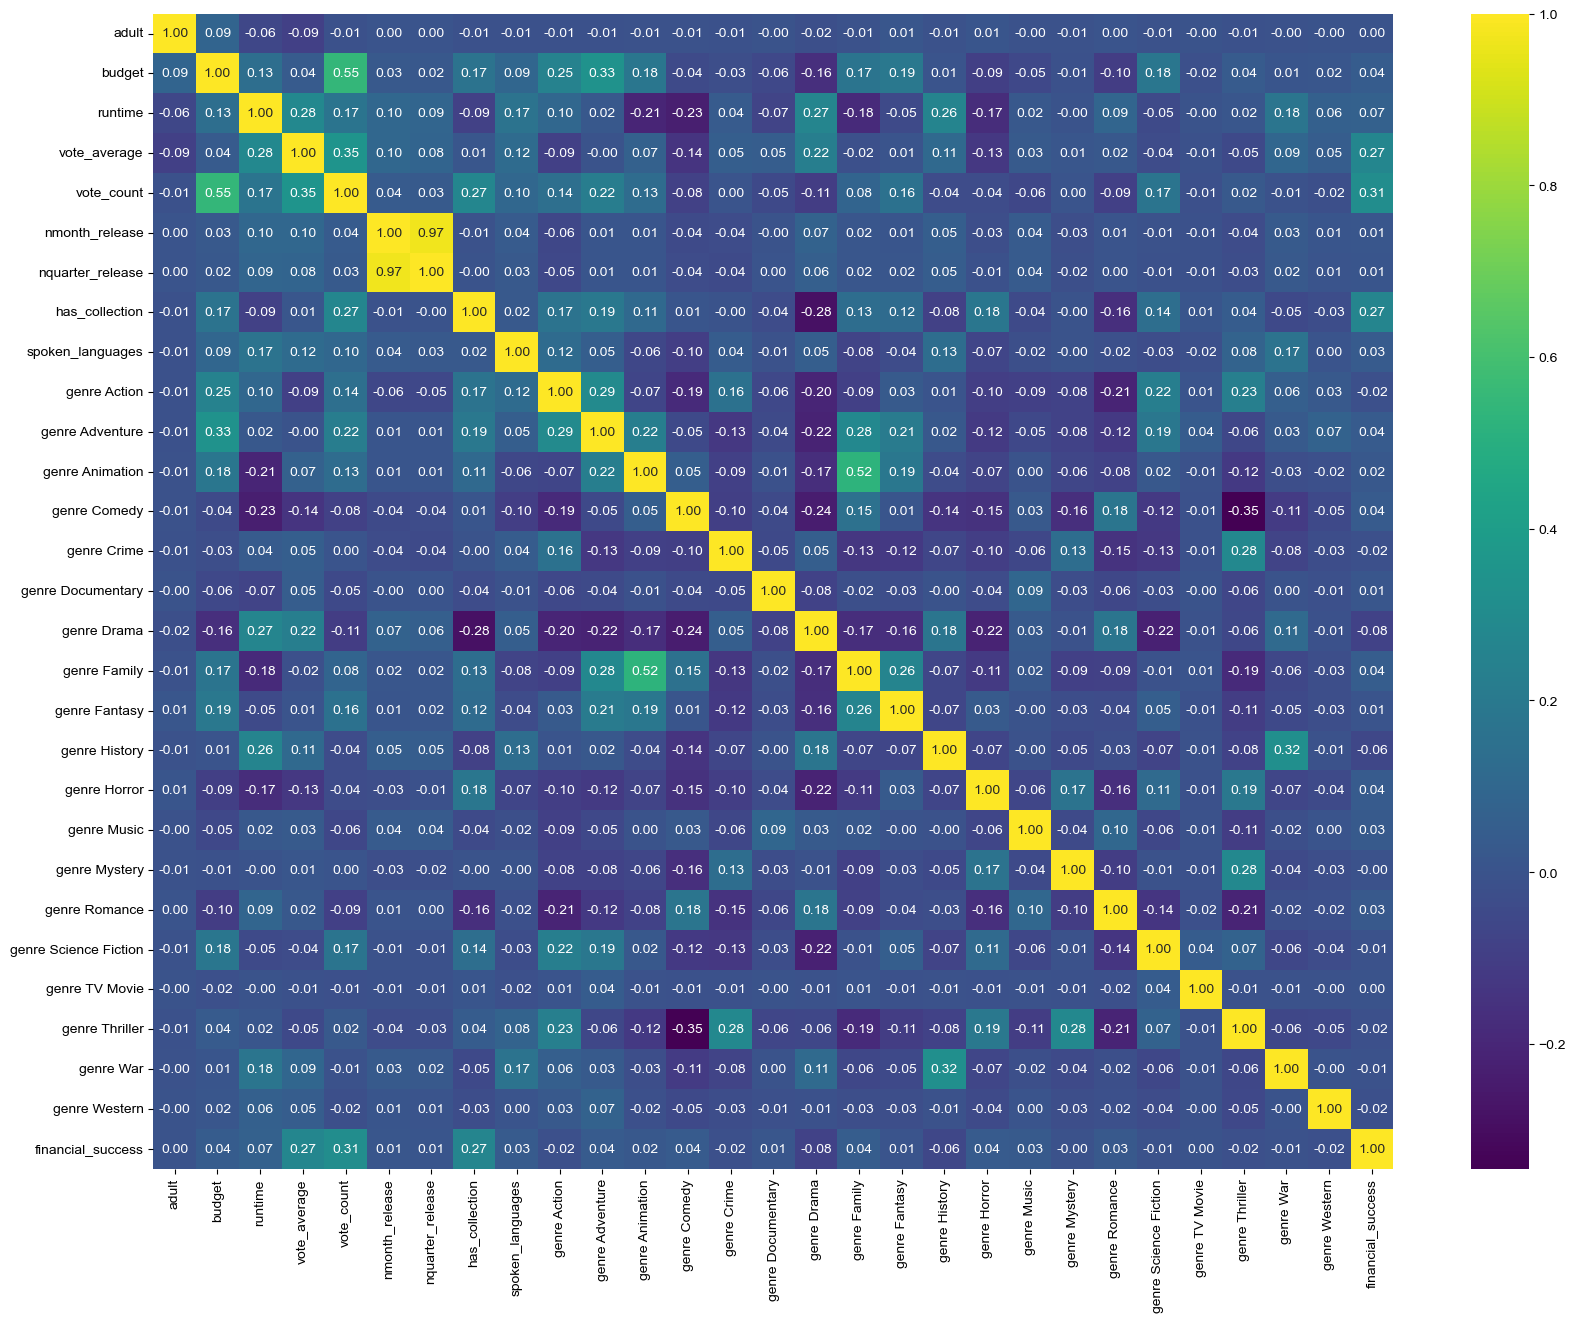

In [389]:
# Gerar matriz de correlação entre todas as variáveis
fig, ax = plt.subplots(figsize=(20, 15))

df_corr = df_movies_abt.drop(['movie_id','revenue','popularity'],axis=1).copy()

sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='viridis', ax=ax);